# WeatherPy
----

#### Note
* Added analysis for all charts in ReadME file

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_path = "Resources/Cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Creating base url for api calls and then one importing my API key
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=aed5467f2114015425137c546ecda4cb&units=imperial&q=


In [4]:
#Setting up empty lists to hold desired variables temp, lat, humidity, cloudiness, windspeed
city_list = []
lat = []
lng = []
temp_max = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
#Initialize count so 1st city outputs with "record 1"
city_count = 0
city_set = 1

print(f"Beginning Data Retrieval")
print(f"-----------------------------")

#Looping through each city and retrieving values to append to lists
for city2 in cities:
    try:
        #make response with query url
        response = requests.get(query_url+city2).json()
        #Printed response object to find desired element names
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_list.append(response['name'])
        #Need to retrieve 13 sets of data, 610 cities = x/13, roughly 45 cities per set
        if city_count >= 45:
            #add 1 to set and reset city count to 1
            city_set += 1
            city_count = 1
        else:
            #Increase city count
            city_count += 1
    
        #Print desired output format per city
        print(f"Processing Record {city_count} of Set {city_set} | {city2}")
    
    #Avoid errors and print desired output format       
    except (KeyError, IndexError):
        print(f"City not found. Skipping...")
        
print(f"-----------------------------")
print(f"Data Retrieval Complete")
print(f"-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | khromtau
Processing Record 2 of Set 1 | kosmynino
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | zhigansk
Processing Record 6 of Set 1 | byron bay
Processing Record 7 of Set 1 | bambous virieux
Processing Record 8 of Set 1 | hovd
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | valparaiso
Processing Record 11 of Set 1 | paita
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | kaitangata
City not found. Skipping...
Processing Record 15 of Set 1 | port lincoln
Processing Record 16 of Set 1 | santa marta
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | pasni
Processing Record 19 of Set 1 | paamiut
Processing Record 20 of Set 1 | clyde river
Processing Record 21 of Set 1 | timmins
Processing Record 22 of Set 1 | coffs harbour
Processing Recor

Processing Record 8 of Set 5 | jimani
Processing Record 9 of Set 5 | lebyazhye
Processing Record 10 of Set 5 | olafsvik
Processing Record 11 of Set 5 | mtwara
Processing Record 12 of Set 5 | santa maria
City not found. Skipping...
Processing Record 13 of Set 5 | faanui
Processing Record 14 of Set 5 | kitimat
Processing Record 15 of Set 5 | mutum
Processing Record 16 of Set 5 | srednekolymsk
Processing Record 17 of Set 5 | yangshe
Processing Record 18 of Set 5 | dali
Processing Record 19 of Set 5 | merritt
Processing Record 20 of Set 5 | yudong
Processing Record 21 of Set 5 | doka
City not found. Skipping...
Processing Record 22 of Set 5 | buta
Processing Record 23 of Set 5 | necochea
City not found. Skipping...
Processing Record 24 of Set 5 | nanortalik
Processing Record 25 of Set 5 | severo-kurilsk
City not found. Skipping...
Processing Record 26 of Set 5 | talnakh
Processing Record 27 of Set 5 | duvan
Processing Record 28 of Set 5 | kamiiso
Processing Record 29 of Set 5 | yining
Proc

Processing Record 16 of Set 9 | raudeberg
Processing Record 17 of Set 9 | axim
Processing Record 18 of Set 9 | nikolskoye
Processing Record 19 of Set 9 | hrubieszow
Processing Record 20 of Set 9 | bambanglipuro
Processing Record 21 of Set 9 | dawlatabad
City not found. Skipping...
City not found. Skipping...
Processing Record 22 of Set 9 | zion
Processing Record 23 of Set 9 | meadow lake
Processing Record 24 of Set 9 | ust-karsk
City not found. Skipping...
Processing Record 25 of Set 9 | hammerfest
Processing Record 26 of Set 9 | kloulklubed
Processing Record 27 of Set 9 | sao raimundo nonato
Processing Record 28 of Set 9 | launceston
Processing Record 29 of Set 9 | mayo
Processing Record 30 of Set 9 | tauberbischofsheim
Processing Record 31 of Set 9 | porto santo
Processing Record 32 of Set 9 | nabire
Processing Record 33 of Set 9 | ahuimanu
City not found. Skipping...
Processing Record 34 of Set 9 | tadine
Processing Record 35 of Set 9 | santa maria del oro
Processing Record 36 of Se

Processing Record 21 of Set 13 | karlovo
Processing Record 22 of Set 13 | oyama
Processing Record 23 of Set 13 | hami
Processing Record 24 of Set 13 | kidal
Processing Record 25 of Set 13 | natal
Processing Record 26 of Set 13 | eureka
Processing Record 27 of Set 13 | kundiawa
Processing Record 28 of Set 13 | honiara
Processing Record 29 of Set 13 | zemio
Processing Record 30 of Set 13 | jining
Processing Record 31 of Set 13 | russell
Processing Record 32 of Set 13 | kutum
Processing Record 33 of Set 13 | bosobolo
Processing Record 34 of Set 13 | anaconda
Processing Record 35 of Set 13 | warrnambool
-----------------------------
Data Retrieval Complete
-----------------------------


In [5]:
#Make a dictinary to hold the data retrieved
weather_dict = {"City": city_list,
               "Lat": lat,
               "Lng": lng,
               "Max Temp": temp_max,
               "Humidity": humidity,
               "Cloudiness": cloudiness,
               "Wind Speed": wind_speed,
               "Country": country,
               "Date": date}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_df = pd.DataFrame(weather_dict)

weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Khromtau,50.2503,58.4347,79.86,30,100,4.16,KZ,1658642889
1,Kosmynino,57.5818,40.7643,74.68,55,0,6.46,RU,1658642889
2,Hobart,-42.8794,147.3294,59.25,79,75,4.61,AU,1658642709
3,Albany,42.6001,-73.9662,73.44,70,52,2.82,US,1658642748
4,Zhigansk,66.7697,123.3711,64.96,59,33,9.75,RU,1658642890


In [7]:
weather_df.to_csv(output_path, encoding='utf-8', index=False)
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Khromtau,50.2503,58.4347,79.86,30,100,4.16,KZ,1658642889
1,Kosmynino,57.5818,40.7643,74.68,55,0,6.46,RU,1658642889
2,Hobart,-42.8794,147.3294,59.25,79,75,4.61,AU,1658642709
3,Albany,42.6001,-73.9662,73.44,70,52,2.82,US,1658642748
4,Zhigansk,66.7697,123.3711,64.96,59,33,9.75,RU,1658642890
...,...,...,...,...,...,...,...,...,...
570,Russell,32.3502,-85.1999,76.60,94,0,0.00,US,1658643064
571,Kutum,14.2000,24.6667,79.16,51,79,11.77,SD,1658643065
572,Bosobolo,4.1833,19.9000,70.92,96,73,1.14,CD,1658643065
573,Anaconda,46.1285,-112.9423,59.58,35,0,1.57,US,1658643065


In [8]:
# Checking the number of cities

weather_df['City'].value_counts()

Khromtau               1
São Raimundo Nonato    1
Dawlatabad             1
Zion                   1
Meadow Lake            1
                      ..
Faanui                 1
Kitimat                1
Mutum                  1
Srednekolymsk          1
Warrnambool            1
Name: City, Length: 575, dtype: int64

In [9]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,5.750000e+02
mean,22.499264,16.491564,70.455270,70.191304,54.165217,7.531461,1.658643e+09
std,32.957906,90.001742,13.226718,21.153206,39.159090,5.567409,7.876608e+01
min,-54.800000,-175.200000,32.110000,8.000000,0.000000,0.000000,1.658642e+09
25%,-3.275400,-62.782800,60.890000,57.000000,13.000000,3.545000,1.658643e+09
50%,29.108100,23.682100,72.550000,74.000000,62.000000,6.110000,1.658643e+09
75%,50.168050,93.208350,79.755000,87.000000,96.000000,10.515000,1.658643e+09
max,78.218600,179.316700,104.140000,100.000000,100.000000,31.410000,1.658643e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#calling any values over 100
weather_df[weather_df["Humidity"]>100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [11]:
#  Get the indices of cities that have humidity over 100%.
# NO values found over 100

In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

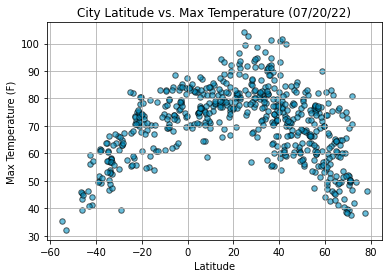

In [13]:
# Making a scatter plot for Latitude vs Max Temperature
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], marker='o', s=30, c='#0492C2', edgecolors='black', alpha=.6)

# Format axis/labels.
plt.title('City Latitude vs. Max Temperature (07/20/22)')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure.
plt.savefig('Resources/Lat_vs_Max_Temp.png')

plt.show()

## Latitude vs. Humidity Plot

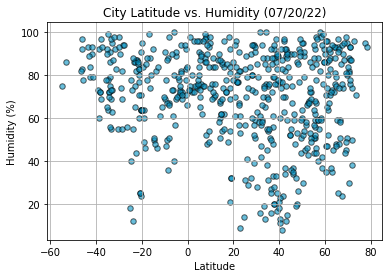

In [14]:
# Making a scatter plot for Latitude vs Humidity
plt.scatter(weather_df['Lat'], weather_df["Humidity"], marker='o', s=30, c='#0492C2', edgecolors='black', alpha=.6)
plt.title("City Latitude vs. Humidity (07/20/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure.
plt.savefig("Resources/Lat_vs_Humidity.png")

plt.show()

## Latitude vs. Cloudiness Plot

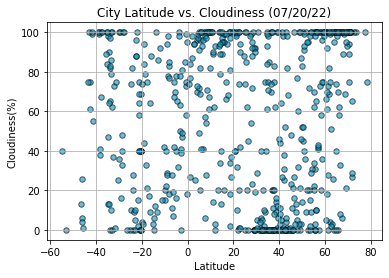

In [15]:
# Making a scatter plot for Latitude vs Cloudiness
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], marker='o', s=30, c='#0492C2', edgecolors='black', alpha=.6)
plt.title("City Latitude vs. Cloudiness (07/20/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(True)

# Save the figure.
plt.savefig("Resources/Lat_vs_Cloudiness.png")

plt.show()

## Latitude vs. Wind Speed Plot

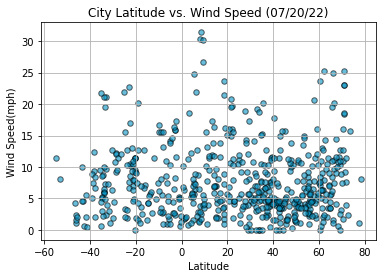

In [16]:
# Making a scatter plot for Latitude vs Wind Speed
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], marker='o', s=30, c='#0492C2', edgecolors='black', alpha=.6)
plt.title("City Latitude vs. Wind Speed (07/20/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.grid(True)

# Save the figure.
plt.savefig("Resources/Lat_vs_Wind_Speed.png")

plt.show()

## Linear Regression

In [17]:
#Split up Northern vs Southern Hemisphere information with loc, north lat > 0, south lat < 0
north_hem_df = weather_df.loc[(weather_df["Lat"] > 0),:]
south_hem_df = weather_df.loc[(weather_df["Lat"] < 0),:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.5865218200510459


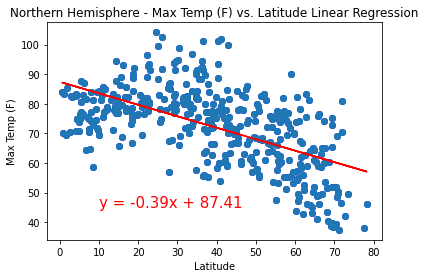

In [27]:
#Define x and y values
xvalues = north_hem_df["Lat"]
yvalues = north_hem_df["Max Temp"]

#find correlation between the variables and print
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
plt.scatter(xvalues, yvalues, c="b")
plt.plot(xvalues,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is {rvalue}")

plt.scatter(xvalues,yvalues)
plt.plot(xvalues,regress_values,"r-")
plt.title('Northern Hemisphere - Max Temp (F) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

#adding line equation to chart
plt.annotate(line_eq,(10,45),fontsize=15,color="red")

# Save the figure.
plt.savefig("Resources/North_Lat_vs_Max_Temp.png")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.7937191209351254


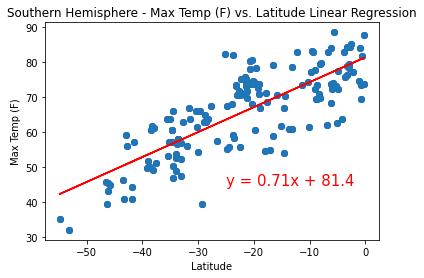

In [28]:
#Define x and y values
xvalues = south_hem_df["Lat"]
yvalues = south_hem_df["Max Temp"]

#find correlation between the variables and print
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
plt.scatter(xvalues, yvalues, c="b")
plt.plot(xvalues,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is {rvalue}")

plt.scatter(xvalues,yvalues)
plt.plot(xvalues,regress_values,"r-")
plt.title('Southern Hemisphere - Max Temp (F) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

#adding line equation to chart
plt.annotate(line_eq,(-25,45),fontsize=15,color="red")

# Save the figure.
plt.savefig("Resources/South_Lat_vs_Max_Temp.png")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is -0.06173701900871344


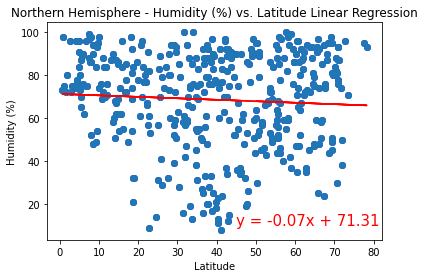

In [34]:
#Define x and y values
xvalues = north_hem_df["Lat"]
yvalues = north_hem_df["Humidity"]

#find correlation between the variables and print
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
plt.scatter(xvalues, yvalues, c="b")
plt.plot(xvalues,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is {rvalue}")

plt.scatter(xvalues,yvalues)
plt.plot(xvalues,regress_values,"r-")
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

#adding line equation to chart
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

# Save the figure.
plt.savefig("Resources/North_Lat_vs_Humidity.png")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is -0.15896467520717725


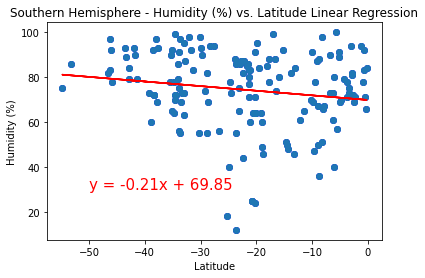

In [38]:
#Define x and y values
xvalues = south_hem_df["Lat"]
yvalues = south_hem_df["Humidity"]

#find correlation between the variables and print
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
plt.scatter(xvalues, yvalues, c="b")
plt.plot(xvalues,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is {rvalue}")

plt.scatter(xvalues,yvalues)
plt.plot(xvalues,regress_values,"r-")
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

#adding line equation to chart
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")

# Save the figure.
plt.savefig("Resources/South_Lat_vs_Humidity.png")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is -0.018616036178394826


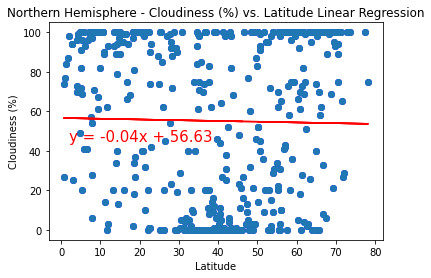

In [52]:
#Define x and y values
xvalues = north_hem_df["Lat"]
yvalues = north_hem_df["Cloudiness"]

#find correlation between the variables and print
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
plt.scatter(xvalues, yvalues, c="b")
plt.plot(xvalues,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is {rvalue}")

plt.scatter(xvalues,yvalues)
plt.plot(xvalues,regress_values,"r-")
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

#adding line equation to chart
plt.annotate(line_eq,(2,45),fontsize=15,color="red")

# Save the figure.
plt.savefig("Resources/North_Lat_vs_Cloudiness.png")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is -0.045553698463462695


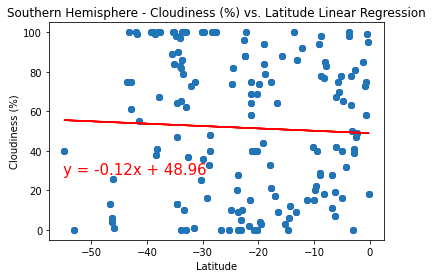

In [64]:
#Define x and y values
xvalues = south_hem_df["Lat"]
yvalues = south_hem_df["Cloudiness"]

#find correlation between the variables and print
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
plt.scatter(xvalues, yvalues, c="b")
plt.plot(xvalues,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is {rvalue}")

plt.scatter(xvalues,yvalues)
plt.plot(xvalues,regress_values,"r-")
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

#adding line equation to chart
plt.annotate(line_eq,(-55,28),fontsize=15,color="red")

# Save the figure.
plt.savefig("Resources/South_Lat_vs_Cloudiness.png")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.024374050986480128


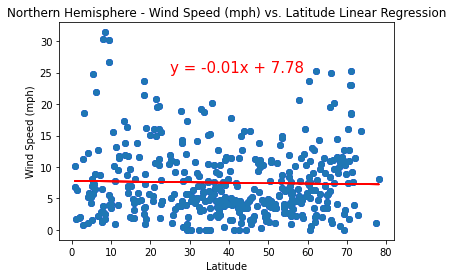

In [68]:
#Define x and y values
xvalues = north_hem_df["Lat"]
yvalues = north_hem_df["Wind Speed"]

#find correlation between the variables and print
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
plt.scatter(xvalues, yvalues, c="b")
plt.plot(xvalues,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is {rvalue}")

plt.scatter(xvalues,yvalues)
plt.plot(xvalues,regress_values,"r-")
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

#adding line equation to chart
plt.annotate(line_eq,(25,25),fontsize=15,color="red")

# Save the figure.
plt.savefig("Resources/North_Lat_vs_Wind_Speed.png")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.034240856480209796


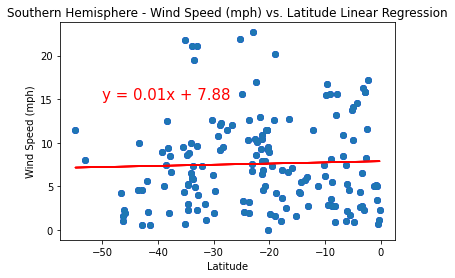

In [70]:
#Define x and y values
xvalues = south_hem_df["Lat"]
yvalues = south_hem_df["Wind Speed"]

#find correlation between the variables and print
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
plt.scatter(xvalues, yvalues, c="b")
plt.plot(xvalues,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is {rvalue}")

plt.scatter(xvalues,yvalues)
plt.plot(xvalues,regress_values,"r-")
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

#adding line equation to chart
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")

# Save the figure.
plt.savefig("Resources/South_Lat_vs_Wind_Speed.png")

plt.show()